In [60]:
""" The following code displays the process of predicting the Gini coefficient using a Random Forest Regressor based
on multiple independent variables. A RandomForestRegressor model from scikit-learn's ensemble module is trained on the 
state_econ dataset that has been created by finding many datasets online with many independent variables that were believed 
to affect Gini coeffienct. The visualization section demonstrates the extraction and visualization of a single decision
tree from the trained Random Forest Regressor. This visualization, created with matplotlib's plot_tree function, offers
insights into how the model interprets the relationships between variables concerning the Gini coefficient prediction. """

" The following code displays the process of predicting the Gini coefficient using a Random Forest Regressor based\non multiple independent variables. A RandomForestRegressor model from scikit-learn's ensemble module is trained on the \nstate_econ dataset that has been created by finding many datasets online with many independent variables that were believed \nto affect Gini coeffienct. The visualization section demonstrates the extraction and visualization of a single decision\ntree from the trained Random Forest Regressor. This visualization, created with matplotlib's plot_tree function, offers\ninsights into how the model interprets the relationships between variables concerning the Gini coefficient prediction. "

In [61]:
# initialize code on the notebook with these packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [62]:
# import the dataset

state_econ = pd.read_csv("../Data/state_econ.csv")

In [63]:
# changed the State and Year columns from columns to indicies

state_econ = state_econ.set_index(["State", "Year"])

In [64]:
# removed features that are highly colinear with other features and with each other

state_econ = state_econ.drop(["Population", "GDP (in millions USD)", "Unadjusted Household Income"], axis = 1)

In [65]:
state_econ

,,gini,min_wage,unemployment,Residents with Bachelor's Degree or Higher,GDP per Capita,% with College Degree,Union Membership %,Adjusted Household Income
State,Year,,,,,,,,
Alabama,2010,0.4720,7.25,10.375000,439863.0,36668.583649,9.191967,10.1,43464.0
Alaska,2010,0.4220,7.75,8.133333,83346.0,74158.000518,11.673354,22.9,63648.0
Arizona,2010,0.4550,7.25,10.300000,691889.0,38686.541091,10.787611,6.4,47044.0
Arkansas,2010,0.4580,6.25,7.858333,252888.0,34560.033078,8.655787,4.0,39018.0
California,2010,0.4710,8.00,12.458333,4610875.0,52839.238517,12.345257,17.5,57020.0
...,...,...,...,...,...,...,...,...,...
Virginia,2019,0.4690,7.25,2.758333,1312800.0,65245.616582,15.380436,11.2,92610.0
Washington,2019,0.4577,13.50,4.233333,1204728.0,80499.686601,15.820682,4.0,93910.0
West Virginia,2019,0.4644,8.75,4.933333,161686.0,44005.262961,9.021916,10.2,61170.0


In [66]:
# split the data into training and testing sets
econ_train, econ_test, gini_train, gini_test = train_test_split(state_econ[state_econ.columns[1:]], state_econ["gini"],
test_size = 0.2, random_state = 69)

# initialize RandomForestRegressor with desired parameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model using the training data
rf_regressor.fit(econ_train, gini_train)

# predict on the test set
predictions = rf_regressor.predict(econ_test)

# calculate Mean Squared Error
mse = mean_squared_error(gini_test, predictions)
print(f"Mean Squared Error: ", mse)


Mean Squared Error:  6.556317707999988e-05


In [67]:
# defining a new dataset as every column without the gini coefficient
econ = state_econ[state_econ.columns[1:]]
econ

,,min_wage,unemployment,Residents with Bachelor's Degree or Higher,GDP per Capita,% with College Degree,Union Membership %,Adjusted Household Income
State,Year,,,,,,,
Alabama,2010,7.25,10.375000,439863.0,36668.583649,9.191967,10.1,43464.0
Alaska,2010,7.75,8.133333,83346.0,74158.000518,11.673354,22.9,63648.0
Arizona,2010,7.25,10.300000,691889.0,38686.541091,10.787611,6.4,47044.0
Arkansas,2010,6.25,7.858333,252888.0,34560.033078,8.655787,4.0,39018.0
California,2010,8.00,12.458333,4610875.0,52839.238517,12.345257,17.5,57020.0
...,...,...,...,...,...,...,...,...
Virginia,2019,7.25,2.758333,1312800.0,65245.616582,15.380436,11.2,92610.0
Washington,2019,13.50,4.233333,1204728.0,80499.686601,15.820682,4.0,93910.0
West Virginia,2019,8.75,4.933333,161686.0,44005.262961,9.021916,10.2,61170.0


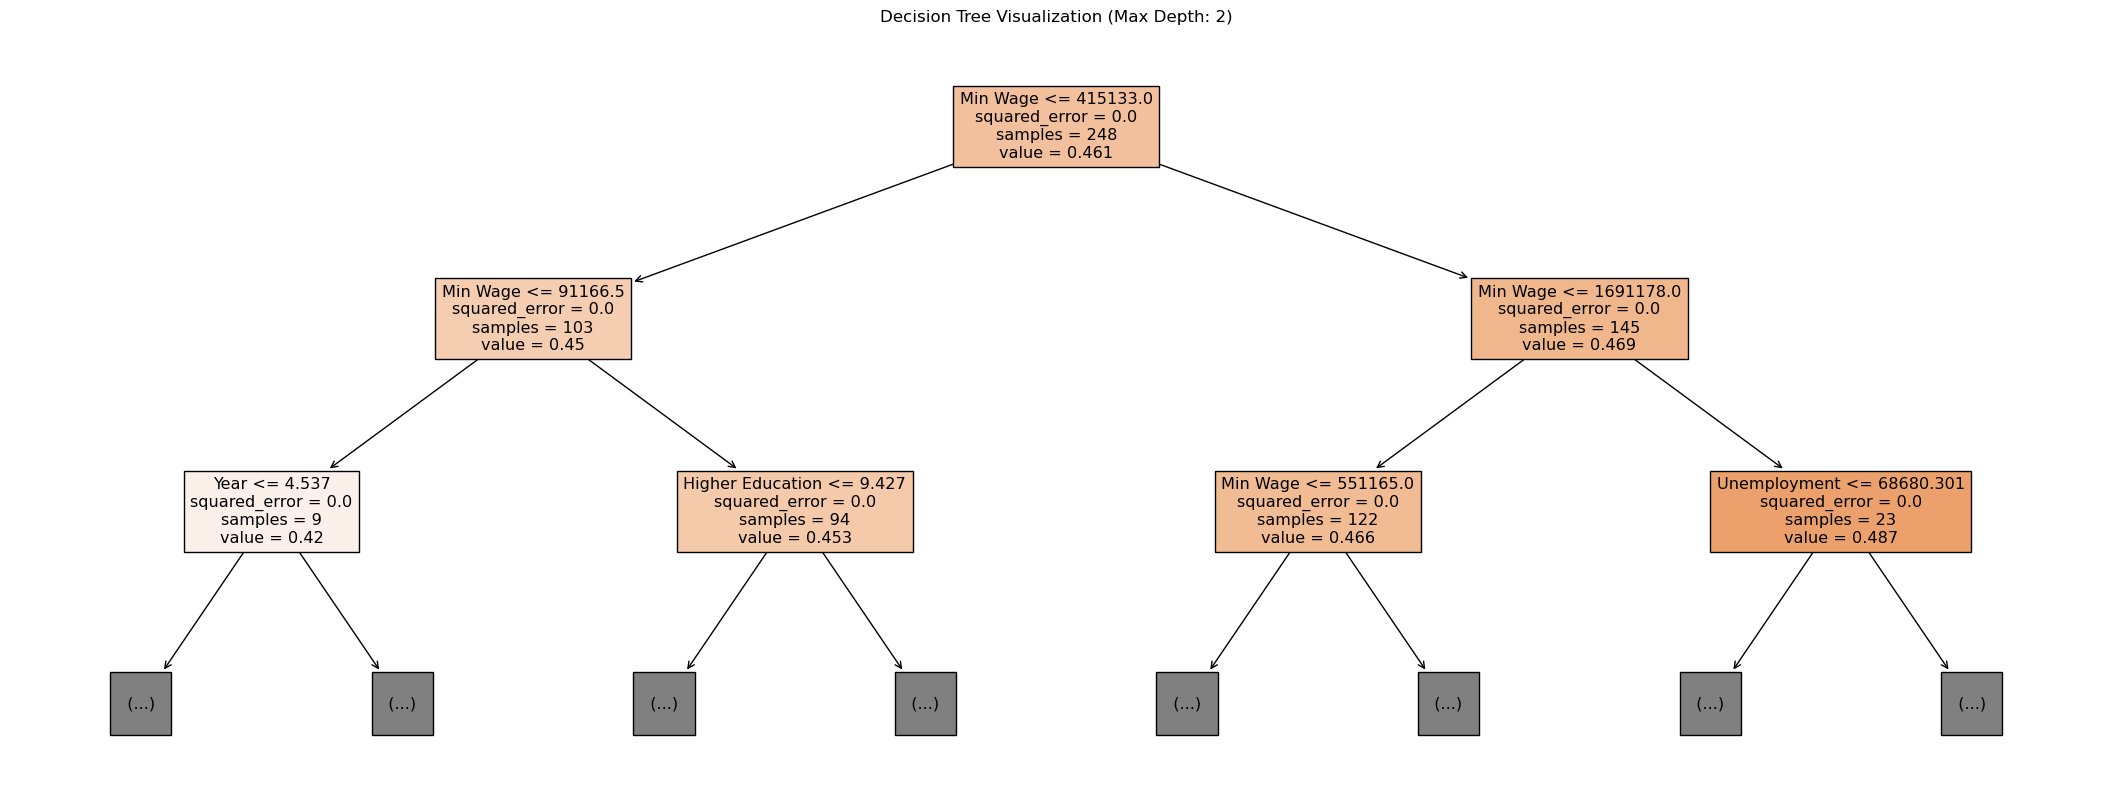

In [68]:
# extracting a single decision tree from the random forest
tree = rf_regressor.estimators_[0]

# added feature names for more representative and clear visualization
feature_names = ['State', 'Year', 'Min Wage', 'Unemployment', 'Higher Education', 'GDP per cap', '% w/ College Degree', 'Union Membership %', 'Adj Household Income']

# plotting the extracted tree with adjusted figure size and limited depth
plt.figure(figsize=(27, 10))
plot_tree(tree, filled=True, feature_names=feature_names, max_depth=2)
plt.title(f"Decision Tree Visualization (Max Depth: 2)")
plt.show()

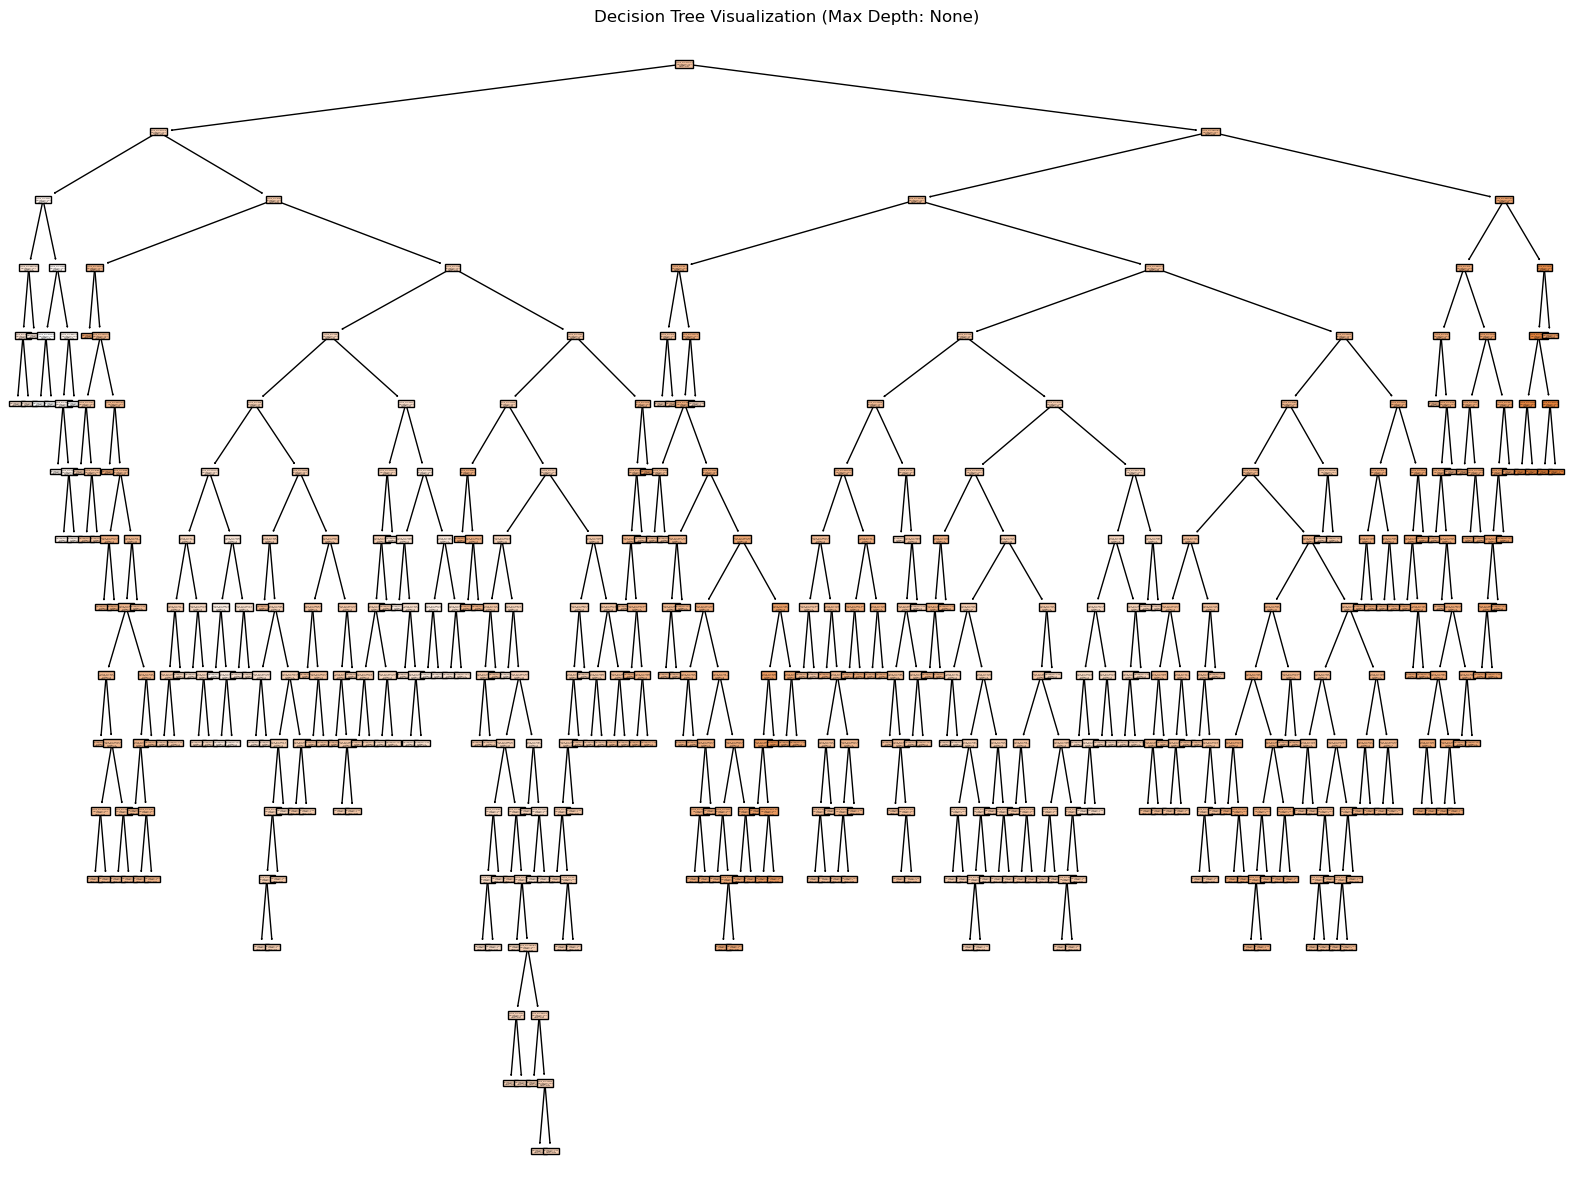

In [69]:
# Plotting the extracted tree with adjusted figure size and without limited depth
plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=[f"feature_{i}" for i in range(econ.shape[1])])
plt.title(f"Decision Tree Visualization (Max Depth: None)")
plt.show()